# TP 1- Conditionnement et Décomposition LU
## Analyse Numérique Matricielle
### Polytech SU, 2023-2024


In [1]:
import numpy as np
from scipy.linalg import hilbert
import matplotlib.pyplot as plt


### Exercice 1
1. Construire la matrice $ H^{[5]} $ en utilisant la bibliothèque **scipy** et la fonction **scipy.linalg.hilbert** ou avec des boucles `for`.

On considère la matrice de Hilbert $ H^{[n]} \in M_n(\mathbb{R}) $ définie pour tout $n \geq 1$ par
$$ H^{[n]}_{ij}=\frac{1}{i+j-1},\, 1\leq i,j\leq n. $$

1. Construire la matrice $ H^{[5]} $ en utilisant la bibliothèque **scipy** et la fonction **scipy.linalg.hilbert** ou avec des boucles `for`.


In [2]:
# 1. Construire la matrice H^{[5]}
H5_scipy = hilbert(5)  # Utilisation de scipy

# Alternative avec boucles for
n = 5
H5_loops = np.zeros((n, n))
for i in range(1, n+1):
    for j in range(1, n+1):
        H5_loops[i-1][j-1] = 1 / (i + j - 1)

# Assurez-vous que les deux méthodes produisent le même résultat
print(H5_scipy - H5_loops)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


2. Calculer $ Cond(H^{[n]}) $ pour la norme $ \Vert\cdot\Vert_2 $ et pour$ 1\leq n\leq 10 $ à l'aide de la fonction `numpy.linalg.cond`. Visualisez le résultat en échelle semilogarithmique en $ y $ (à l'aide de la fonction `matplotlib.pyplot.semilogy`). La matrice $ H^{[n]} $ est-elle bien ou mal conditionnée selon vous ?

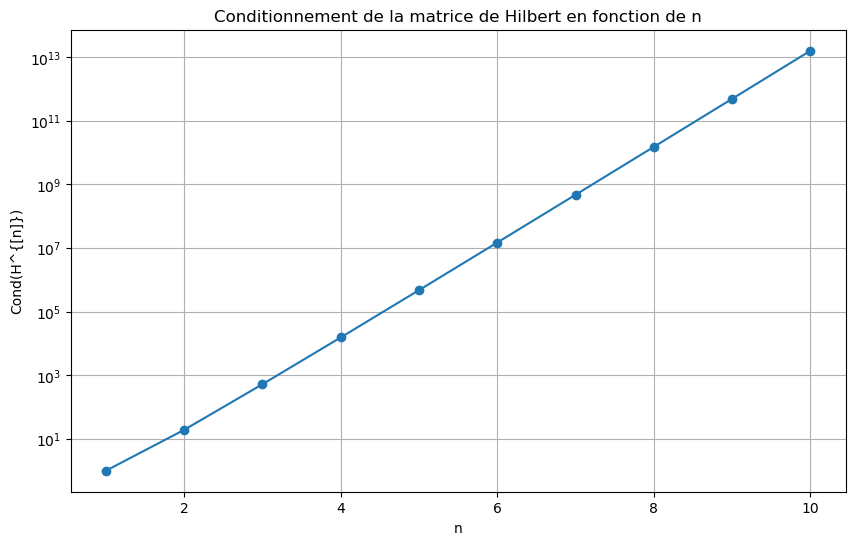

In [3]:
# 2. Calculer Cond(H^{[n]}) pour la norme \Vert\cdot\Vert_2 et visualiser
n_values = range(1, 11)  # n de 1 à 10
condition_numbers = [np.linalg.cond(hilbert(n)) for n in n_values]

plt.figure(figsize=(10, 6))
plt.semilogy(n_values, condition_numbers, marker='o')
plt.xlabel('n')
plt.ylabel('Cond(H^{[n]})')
plt.title('Conditionnement de la matrice de Hilbert en fonction de n')
plt.grid(True)
plt.show()

3. Répéter le point précédent avec $ Id+H^{[n]} $ au lieu de $ H^{[n]} $. Que remarquez vous ?

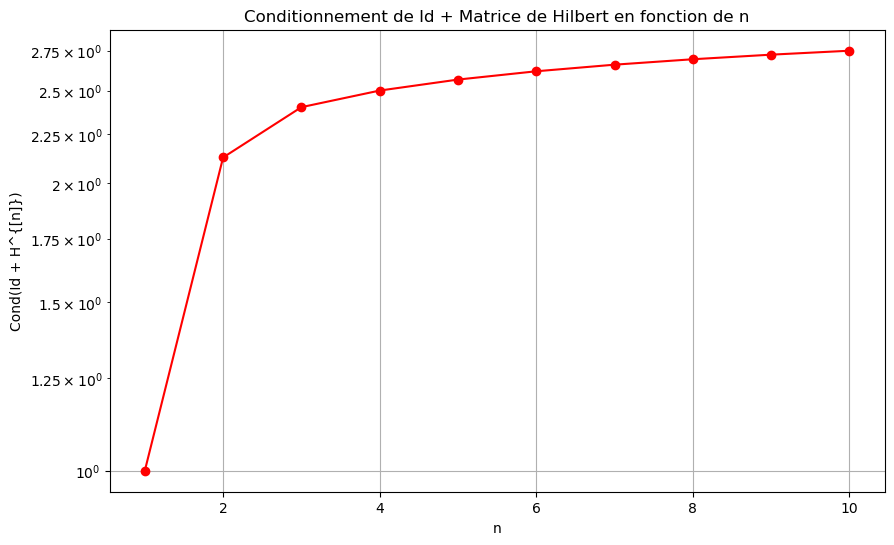

In [4]:
# 3. Répéter avec Id+H^{[n]}
condition_numbers_id = [np.linalg.cond(np.eye(n) + hilbert(n)) for n in n_values]

plt.figure(figsize=(10, 6))
plt.semilogy(n_values, condition_numbers_id, marker='o', color='red')
plt.xlabel('n')
plt.ylabel('Cond(Id + H^{[n]})')
plt.title('Conditionnement de Id + Matrice de Hilbert en fonction de n')
plt.grid(True)
plt.show()

### Exercice 2

On considère la matrice de Vandermonde
$$A=\begin{pmatrix}
y_1^{n-1}&\dots&y_1^2&y_1&1\\
\vdots&\vdots&y_2^2&y_2&1\\
\vdots&\vdots&\vdots&\vdots&\vdots\\
y_n^{n-1}&\dots&y_n^2&y_n&1
\end{pmatrix},$$
où les points $y_1,\dots,y_n$ sont équirépartis sur $[0,1]$. Cette matrice peut être construite en Python à l'aide des fonctions suivantes : 

`y = np.linspace(0, 1, n)`

`A = np.vander(y, increasing=False)`

On souhaite résoudre le système linéaire $Ax=b$ où
$$b=\begin{pmatrix}
1+y_1^2\\\vdots\\1+y_n^2
\end{pmatrix}.$$
La solution exacte est connue et vaut $x=(0,\ldots,0,1,0,1)^T$.

1. Résoudre le système linéaire en utilisant la fonction `numpy.linalg.solve`. On note $x_c$ la solution obtenue.  Evaluer l'erreur relative  $\epsilon_{n} = \frac{\| x_{c} - x\|}{\|x\|}$  pour $n=4$.

In [5]:
### 1. Résoudre le système linéaire pour \( n = 4 \) et évaluer l'erreur relative :

import numpy as np

n = 4
y = np.linspace(0, 1, n)
A = np.vander(y, increasing=False)
b = 1 + y**2

x_exact = np.zeros(n)
x_exact[-3:] = [1, 0,1]

x_computed = np.linalg.solve(A, b)

# Calcul de l'erreur relative
error = np.linalg.norm(x_computed - x_exact, ord=2) / np.linalg.norm(x_exact, ord=2)
print(f"Erreur relative pour n=4: {error}")


Erreur relative pour n=4: 2.1268813444517158e-15


2. La variable d'arrondi en Python, notée $\mathbf{eps}$, peut être obtenue via `numpy.finfo(float).eps`. Une borne supérieure de l'erreur relative $\epsilon_{n}$ est donnée par
$$
\eta_{n} = \text{Cond}(A) \mathbf{eps} .
$$
Comparer l'erreur relative $\epsilon_{n}$ calculée précédemment avec la borne obtenue $\eta_{n}$ pour $n=4$.

In [6]:
### 2. Comparer l'erreur relative avec la borne pour \( n = 4 \):


epsilon = np.finfo(float).eps
eta_4 = epsilon * np.linalg.cond(A, p=2)
print(f"Erreur d'arrondi en Python: {epsilon}")
print(f"Borne pour n=4: {eta_4}")



Erreur d'arrondi en Python: 2.220446049250313e-16
Borne pour n=4: 2.1953047936668682e-14


3. Répéter les points $1.$ et $2.$ pour $n=4,6,8,\ldots,20$. Visualiser l'erreur $\epsilon_n$, la borne supérieure $\eta_n$ ainsi que le résidu normalisé $r_n = \frac{\| b - Ax_{c} \|}{\|b\|}$ en fonction de $n$. Pour cela, tracer deux graphes, un avec une échelle logarithmique à l'aide de la fonction `matplotlib.pyplot.loglog` et l'autre en échelle semilogarithmique à l'aide de la fonction `matplotlib.pyplot.semilogy`. Quel type de croissance de l'erreur $\epsilon_n$ observe-t-on ? Est-ce que le résidu $r_n$ est un bon indicateur de l'erreur $\epsilon_n$ ? Et $\eta_n$ ?

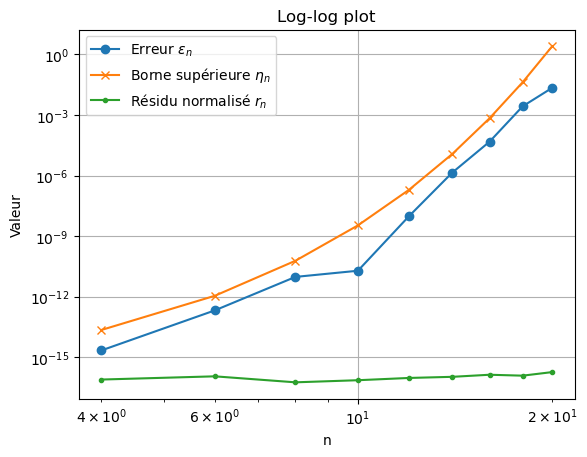

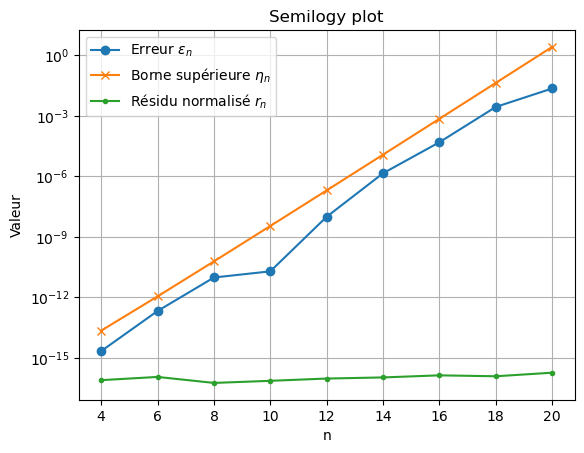

In [7]:
### 3. Répéter pour \( n=4,6,8,\ldots,20 \) et visualiser les erreurs:

ns = list(range(4, 21, 2))
errors = []
etas = []
residuals = []

for n in ns:
    y = np.linspace(0, 1, n)
    A = np.vander(y, increasing=False)
    b = 1 + y**2

    x_exact = np.zeros(n)
    x_exact[-3:] = [1, 0,1]

    x_computed = np.linalg.solve(A, b)

    error = np.linalg.norm(x_computed - x_exact, ord=2) / np.linalg.norm(x_exact, ord=2)
    eta = epsilon * np.linalg.cond(A, p=2)
    residual = np.linalg.norm(b - np.dot(A, x_computed), ord=2) /   np.linalg.norm(b, ord=2) 

    errors.append(error)
    etas.append(eta)
    residuals.append(residual)

# Visualisation
import matplotlib.pyplot as plt

plt.figure()
plt.loglog(ns, errors, label="Erreur $\epsilon_n$", marker='o')
plt.loglog(ns, etas, label="Borne supérieure $\eta_n$", marker='x')
plt.loglog(ns, residuals, label="Résidu normalisé $r_n$", marker='.')
plt.xlabel("n")
plt.ylabel("Valeur")
plt.legend()
plt.title("Log-log plot")
plt.grid(True)

plt.figure()
plt.semilogy(ns, errors, label="Erreur $\epsilon_n$", marker='o')
plt.semilogy(ns, etas, label="Borne supérieure $\eta_n$", marker='x')
plt.semilogy(ns, residuals, label="Résidu normalisé $r_n$", marker='.')
plt.xlabel("n")
plt.ylabel("Valeur")
plt.legend()
plt.title("Semilogy plot")
plt.grid(True)

plt.show()


4. (a) Construire la matrice
$$A=\begin{pmatrix}
2&-1&&&\\-1&2&\ddots&&\\&\ddots&\ddots&\ddots&\\&&\ddots&\ddots&-1\\
&&&-1&2
\end{pmatrix}.$$
pour $n\geq 1$ en utilisant la bibliothèque `numpy`.

(b) Répéter le point $3.$ pour cette matrice avec $b=(2,2,\ldots,2)^T$ pour $n=5,10,\ldots,100$. Ici la solution vaut 
$$
x= \begin{pmatrix} 1\cdot n \\2 \cdot (n-1) \\ \vdots \\n \cdot 1 \end{pmatrix}
$$
Commenter les résultats obtenus.

In [11]:
### 4. Matrice et visualisation pour une nouvelle matrice

#(a) Construction de la matrice :


def create_matrix(n):
    A = 2 * np.eye(n) - np.eye(n, k=1) - np.eye(n, k=-1)
    return A


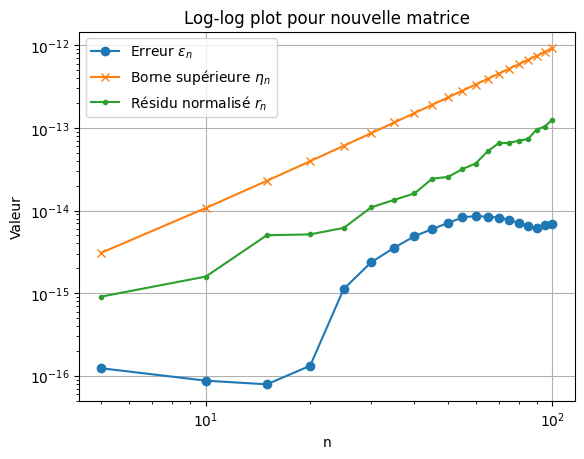

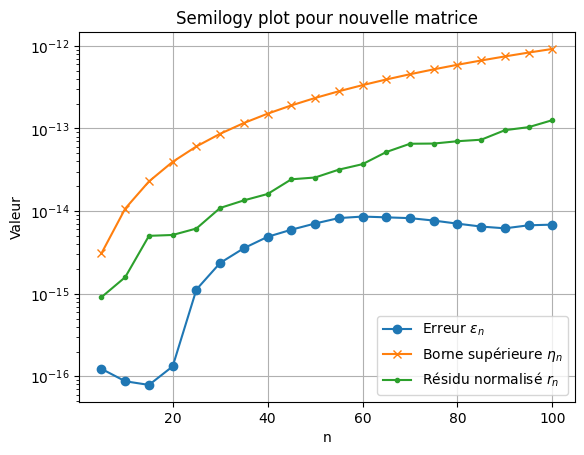

In [15]:
# (b) Répéter le point 3 :


ns = list(range(5, 101, 5))
errors_new = []
etas_new = []
residuals_new = []

for n in ns:
    A = create_matrix(n)
    b = np.full(n, 2)
    x_exact = np.arange(1,n+1,1)*np.arange(n,0,-1)

    x_computed = np.linalg.solve(A, b)

    error = np.linalg.norm(x_computed - x_exact, ord=2) / np.linalg.norm(x_exact, ord=2)
    eta = epsilon * np.linalg.cond(A, p=2)
    residual = np.linalg.norm(b - np.dot(A, x_computed), ord=2) / np.linalg.norm(b, ord=2) 

    errors_new.append(error)
    etas_new.append(eta)
    residuals_new.append(residual)

# Visualisation
plt.figure()
plt.loglog(ns, errors_new, label="Erreur $\epsilon_n$", marker='o')
plt.loglog(ns, etas_new, label="Borne supérieure $\eta_n$", marker='x')
plt.loglog(ns, residuals_new, label="Résidu normalisé $r_n$", marker='.')
plt.xlabel("n")
plt.ylabel("Valeur")
plt.legend()
plt.title("Log-log plot pour nouvelle matrice")
plt.grid(True)

plt.figure()
plt.semilogy(ns, errors_new, label="Erreur $\epsilon_n$", marker='o')
plt.semilogy(ns, etas_new, label="Borne supérieure $\eta_n$", marker='x')
plt.semilogy(ns, residuals_new, label="Résidu normalisé $r_n$", marker='.')
plt.xlabel("n")
plt.ylabel("Valeur")
plt.legend()
plt.title("Semilogy plot pour nouvelle matrice")
plt.grid(True)

plt.show()